In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15999 non-null  int64  
 1   type            15999 non-null  object 
 2   amount          15999 non-null  float64
 3   nameOrig        15999 non-null  object 
 4   oldbalanceOrg   15999 non-null  float64
 5   newbalanceOrig  15999 non-null  float64
 6   nameDest        15999 non-null  object 
 7   oldbalanceDest  15999 non-null  float64
 8   newbalanceDest  15999 non-null  float64
 9   isFraud         15999 non-null  int64  
 10  isFlaggedFraud  15999 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.3+ MB


In [4]:
#Let’s see the mean, count , minimum and maximum values of the data.
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,15999.000000,1.599900e+04,1.599900e+04,1.599900e+04,1.599900e+04,1.599900e+04,15999.000000,15999.0
mean,5.361585,1.144297e+05,7.172959e+05,7.322475e+05,8.054745e+05,1.131963e+06,0.004938,0.0
std,2.501721,2.817263e+05,1.917880e+06,1.959206e+06,2.485147e+06,3.128831e+06,0.070098,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,3.000000,4.738340e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.000000,1.328598e+04,1.991800e+04,6.808590e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.253290e+05,1.178770e+05,1.119765e+05,2.398809e+05,2.816413e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.290000e+07,1.300000e+07,2.130000e+07,2.530000e+07,1.000000,0.0


In [5]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
print(data.type.value_counts())

type
PAYMENT     8850
CASH_IN     2611
CASH_OUT    2537
TRANSFER    1576
DEBIT        425
Name: count, dtype: int64


In [7]:
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [8]:
#Data Visualization
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

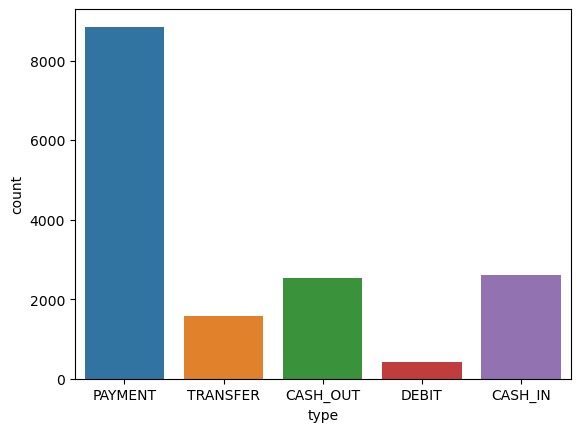

In [9]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

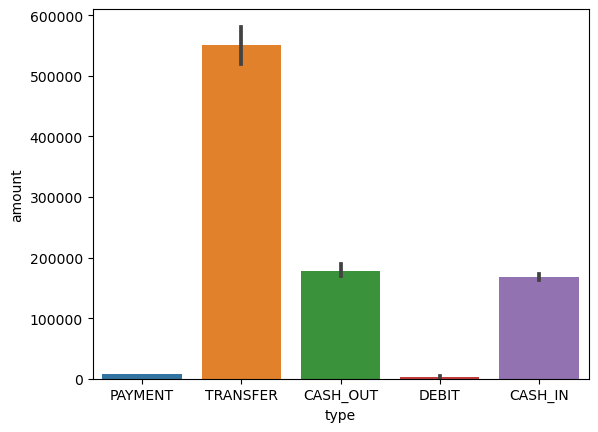

In [10]:
sns.barplot(x='type', y='amount', data=data)

In [11]:
data['isFraud'].value_counts()

isFraud
0    15920
1       79
Name: count, dtype: int64

In [12]:
#Dropping irrelevant columns like nameOrig, nameDest.
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [13]:
# drop the irrelevant columns
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [14]:
#Let’s check the shape of extracted data.
X.shape, y.shape

((15999, 11), (15999,))

In [15]:
#Now let’s split the data into 2 parts : Training and Testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [16]:
#classification
from sklearn.linear_model import LogisticRegression
#decision tree and mean of individual tree
from sklearn.ensemble import RandomForestClassifier
#classification
from sklearn.svm import SVC
#speed and performamce and used for classification and regression tasks
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
#scaling
from sklearn.preprocessing import StandardScaler

In [1]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize LogisticRegression with increased max_iter 
model1 = LogisticRegression(max_iter=1000)
524# Initialize LogisticRegression with a different solver

model3 = XGBClassifier()
model4 = SVC(kernel='rbf', probability=True)
model5 = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)

# List of models
models = [model1, model2, model3, model4, model5]

# Normalize or scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
for i, model in enumerate(models, start=1):
    model.fit(X_train_scaled, y_train)
    print(f'Model {i}: {type(model).__name__}')  # Print only the model's class name
     
    train_preds = model.predict_proba(X_train_scaled)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = model.predict_proba(X_test_scaled)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()



NameError: name 'LogisticRegression' is not defined

In [97]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

0.9975
['No Fraud']


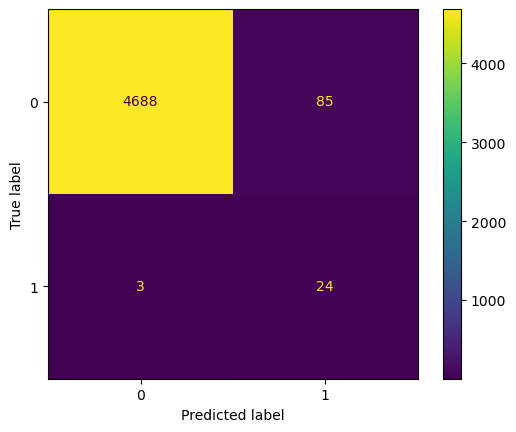

In [86]:
#Accuracy=tp+tn/all
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your models and stored them in the 'models' list

# Calculate confusion matrix for the second model (assuming it's the XGBClassifier)
cm = confusion_matrix(y_test, models[1].predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_)
disp.plot()
plt.show()
